<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [5]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

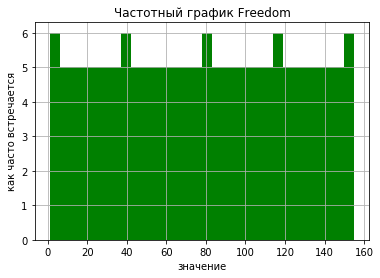

In [51]:
# Частотный график для Freedom

n, bins, patches = plt.hist(df['Freedom'], 30, facecolor='g')

plt.xlabel('значение')
plt.ylabel('как часто встречается')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

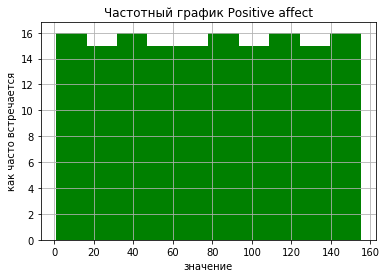

In [58]:
# Частотный график для Positive affect

n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('значение')
plt.ylabel('как часто встречается')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [9]:
# У столбцов freedom и Positive affect есть по 1 значению NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [23]:
df.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [25]:
df['Freedom'].mean()

78.0

In [55]:
# убрала из выборки значение NaN
freedom = df[~pd.isnull(df.Freedom)]['Freedom']
positive_affect = df[~pd.isnull(df['Positive affect'])]['Positive affect']

In [52]:
# основные стат величины Freedom

print('Мат ожидание: ', statistics.mean(freedom))
print('Медиана: ', statistics.median(freedom))
# print('Мода: ', statistics.mode(freedom)) - см комментарий ниже
print('Макс: ', max(freedom))
print('Мин: ', min(freedom))
print('Стандартное отклонение: ', statistics.pstdev(freedom))
print('Дисперсия: ', statistics.pvariance(freedom))
print('Размах: ', max(freedom)-min(freedom))
print('NaN выбросы', df.Freedom.isnull().sum())
# все значения лежат в интервале от 0 до 160, выбросов, кроме 1 NaN нет

Мат ожидание:  78.0
Медиана:  78.0
Макс:  155.0
Мин:  1.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Размах:  154.0
NaN выбросы 1


In [56]:
# основные стат величины Positive affect

print('Мат ожидание: ', statistics.mean(positive_affect))
print('Медиана: ', statistics.median(positive_affect))
# print('Мода: ', statistics.mode(positive_affect)) - см комментарий ниже
print('Макс: ', max(positive_affect))
print('Мин: ', min(positive_affect))
print('Стандартное отклонение: ', statistics.pstdev(positive_affect))
print('Дисперсия: ', statistics.pvariance(positive_affect))
print('Размах: ', max(positive_affect)-min(positive_affect))
print('NaN выбросы', df['Positive affect'].isnull().sum())
# все значения лежат в интервале от 0 до 160, выбросов, кроме 1 NaN нет

Мат ожидание:  78.0
Медиана:  78.0
Макс:  155.0
Мин:  1.0
Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0
Размах:  154.0
NaN выбросы 1


Почему нельзя найти моду?

In [0]:
# моду нельзя найти, т.к. несколько самых частых значений встречаются одинаковое количество раз

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [61]:
from scipy.stats import pearsonr
?pearsonr

In [62]:
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

# знак коэфициента говорит о том, что при увеличении 
# значений 1 выборки увеличиваются значения 2 выборки

0.6817698430601657


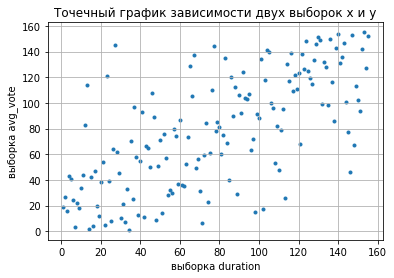

In [54]:
# построим график

fr = df['Freedom']
p_affect = df['Positive affect']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(fr, p_affect, marker='.')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [64]:
# центрируем

freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

# масштабируем

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))


0.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

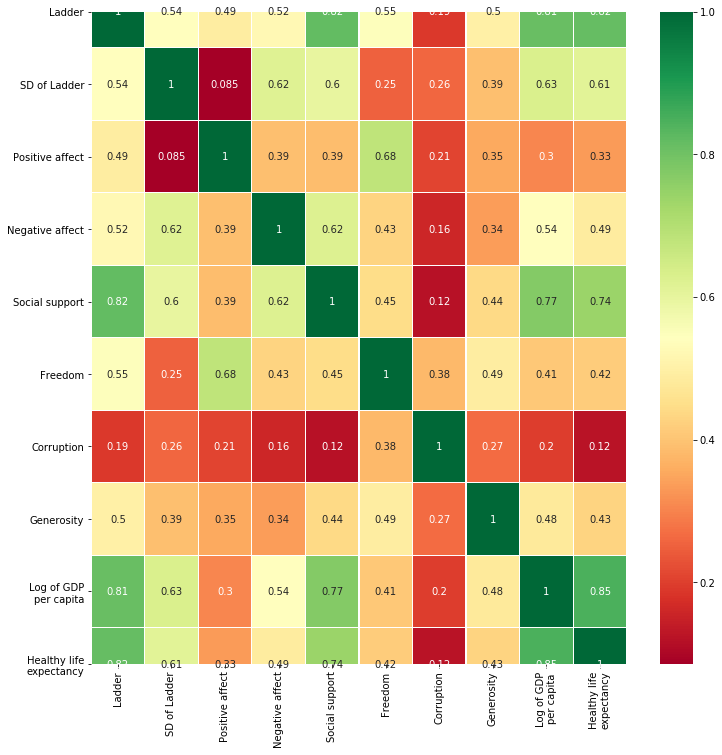

In [65]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [17]:
ssl._create_default_https_context = ssl._create_unverified_context
import io
import requests
url="http://yustiks.ru/avocado.csv"
df1=pd.read_csv(url)
df1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [15]:
df1.iloc[0,4] + df1.iloc[0,5] + df1.iloc[0,6] 

55539.75

Сделать частотный график колонки AveragePrice. Какое это распределение?

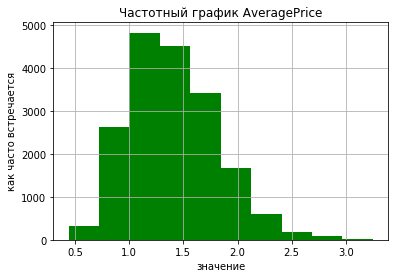

In [68]:
# Частотный график для AveragePrice - напоминает нормальное распределение

n, bins, patches = plt.hist(df1['AveragePrice'], 10, facecolor='g')

plt.xlabel('значение')
plt.ylabel('как часто встречается')
plt.title('Частотный график AveragePrice')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [18]:
df2 = df1.iloc[:, [2, 4, 5, 6]]

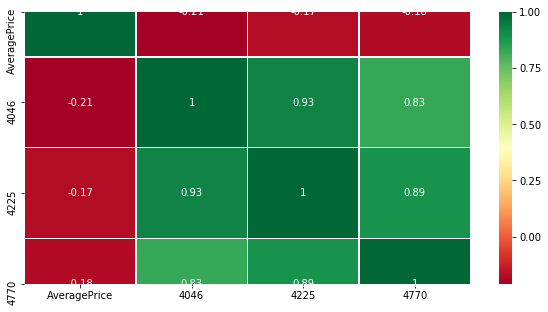

In [20]:
#data.corr()--> строим матрицу корреляций
import seaborn as sns
sns.heatmap(df2.corr(),annot=True,cmap='RdYlGn',linewidths=0.5) 
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(10,5)
plt.show()

In [ ]:
"""
Выводы.

Average Price коэф корреляции отрицательный близкий к нулю со данными 4770, 4225, 4046.
Корреляции нет.

4046 & 4770: коэф корреляции = 0,83, высокий, прямая корелляция
4225 & 4770: коэф корреляции = 0,89, высокий, прямая корелляция
4046 & 4225: коэф корреляции = 0,93, высокий, прямая корелляция, 
можно ли сказать, что у этой пары самая высокая корреляция?

""" 

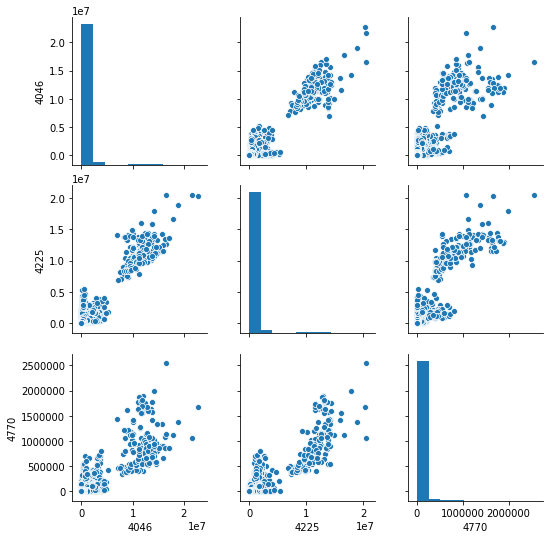

In [22]:
# построим график зависимостей

sns_plot = sns.pairplot(
    df2[['4046', '4225', '4770']])
sns_plot